Presa-Depredador

Importar librería numpy

In [1]:
import numpy as np

Importar librería matplotlib.pyplot

In [2]:
import matplotlib.pyplot as plt

Importar librería scipy.integrate

In [3]:
from scipy.integrate import odeint

Función del sistema en forma canónica

In [4]:
def df_dt(x, t, a, b, c, d):
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])

Parámetros

In [5]:
a = 0.1
b = 0.02
c = 0.3
d = 0.01

Condiciones iniciales

In [6]:
x0 = 40   # Presas
y0 = 9    # Depredadores
conds_iniciales = np.array([x0, y0])

Condiciones para integración

In [7]:
tf = 200
N = 800
t = np.linspace(0, tf, N)

Solución

In [8]:
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

Generar gráfica

In [9]:
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')

In [10]:
%matplotlib inline

Gráfica

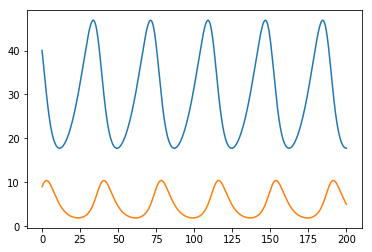

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def df_dt(x, t, a, b, c, d):
    """Función del sistema en forma canónica"""
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])

# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01

# Condiciones iniciales
x0 = 40   # Presas
y0 = 9    # Depredadores
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)

solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')

Número de presas en función del número de depredadores, en lugar de a lo largo del tiempo

C:\Users\crist\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\crist\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


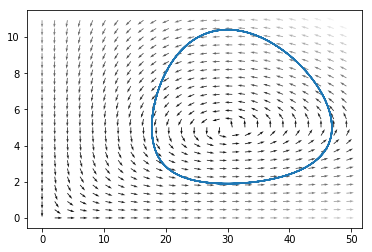

In [12]:
x_max = np.max(solucion[:,0]) * 1.05
y_max = np.max(solucion[:,1]) * 1.05

x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)

xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0, a, b, c, d)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm

plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
plt.plot(solucion[:, 0], solucion[:, 1])

Si el número inicial de cebras y leones hubiese sido otro

NameError: name 'constant' is not defined

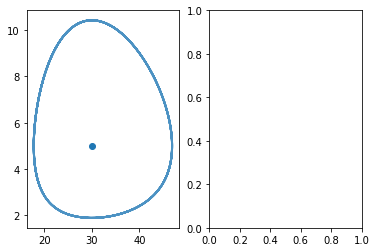

In [13]:
def C(x, y, a, b, c, d):
    return a * np.log(y) - b * y + c * np.log(x) - d * x

fig, ax = plt.subplots(1,2)

ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].scatter(c/d, a/b)
levels = (0.5, 0.6, 0.7, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.775, 0.78, 0.781)
ax[0].contour(xx, yy, constant, levels, colors='blue', alpha=0.3)

ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')

Simulación caso 1

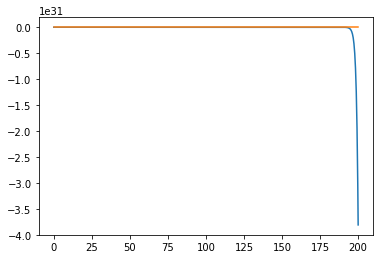

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def df_dt(x, t, a, b, c, d):
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])

a = 0.9
b = 0.4
c = 0.03
d = 0.07

x0 = 40
y0 = 9
conds_iniciales = np.array([x0, y0])

tf = 200
N = 800
t = np.linspace(0, tf, N)

solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')

Simulación caso 2

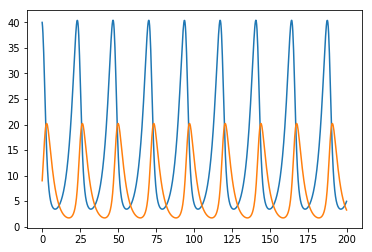

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def df_dt(x, t, a, b, c, d):
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])

a = 0.3
b = 0.04
c = 0.3
d = 0.02

x0 = 40
y0 = 9
conds_iniciales = np.array([x0, y0])

tf = 200
N = 800
t = np.linspace(0, tf, N)

solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')

 Implementación método de Runge Kutta

Implementación para resolver x(prima) = f(x,t) with x(t[0]) = x0

In [ ]:
def rk4( f, x0, t ):
    n = len( t )
    x = np.array( [ x0 ] * n ) 
    for i in xrange( n - 1 ):
        h = t[i+1] - t[i] 
        # k1 es el incremento basado en la pendiente al comienzo del intervalo (igual que Euler)
        # k2 es el incremento basado en la pendiente en el punto medio del intervalo (con x + 0.5 * k1)
        # k3 es OTRA VEZ el incremento basado en la pendiente en el punto medio (con x + 0.5 * k2)
        # k4 es el incremento basado en la pendiente al final del intervalo
        k1 = f( x[i], t[i] )
        k2 = f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = f( x[i] + h * k3, t[i] + h )
        x[i+1] = x[i] + h * ( ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0 )
    return x

Crear matriz que contiene la ecuación diferencial de Lotka Volterra

In [ ]:
def model(state,t):
    x,y = state
    a = 0.08
    b = 0.002
    c = 0.2
    d = 0.0004
    return np.array([ x*(a-b*y) , -y*(c - d*x) ])

Demostración método de Runge Kutta

In [ ]:
from pylab import *
x0 = 500
y0 = 20

t = np.linspace( 0, 500, 1000 )

result = rk4( model, [x0,y0], t )
print result

plt.plot(t,result)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('x (prey)','y (predator)'))
plt.title('Lotka-Volterra Model')
plt.show()

Código

[[ 500.           20.        ]
 [ 510.10745345   20.02018129]
 [ 520.39808197   20.08135027]
 ..., 
 [ 362.41188098   26.32226887]
 [ 367.53847736   25.62011619]
 [ 372.99120675   24.9631173 ]]


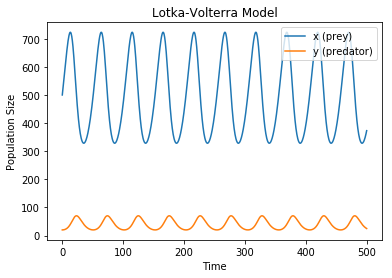

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def rk4( f, x0, t ):
    n = len( t )
    x = np.array( [ x0 ] * n )  

    for i in xrange( n - 1 ):
        h = t[i+1] - t[i]       
        k1 = f( x[i], t[i] )
        k2 = f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = f( x[i] + h * k3, t[i] + h )

        x[i+1] = x[i] + h * ( ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0 )

    return x

def model(state,t):
    x,y = state
    a = 0.08
    b = 0.002
    c = 0.2
    d = 0.0004

    return np.array([ x*(a-b*y) , -y*(c - d*x) ]) # corresponds to [dx/dt, dy/dt]

from pylab import *
x0 = 500
y0 = 20

t = np.linspace( 0, 500, 1000 )

result = rk4( model, [x0,y0], t )
print (result)

plt.plot(t,result)

plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('x (prey)','y (predator)'))
plt.title('Lotka-Volterra Model')
plt.show()